### Your name:

<pre> HufsaT</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Dimesionality Reduction

Q. What is the curse of dimensionality?

Adding more features, or training with many features, adds important data to the model, but it will also slow down the training process and a gigantic number of featues may make finding the best solution harder. You risk overfitting the model.

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, using the kernel trick i.e. Kernel PCA.

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

You can't really evaluate this. But you can use somethinglike Grid Search as part of the pipeline to prepping your dataset to pick the best dimensionality reduction kernel.

Q. Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
n_feats = 28*28

# Reshape and flatten data
X = np.vstack([X_train, X_test]).reshape(-1, n_feats)
y = np.hstack([y_train, y_test])
print("Old X shape:", X_train.shape)
print("New X shape:", X.shape)
print("y shape:", y.shape)

Using TensorFlow backend.


Old X shape: (60000, 28, 28)
New X shape: (70000, 784)
y shape: (70000,)


(-0.5, 27.5, 27.5, -0.5)

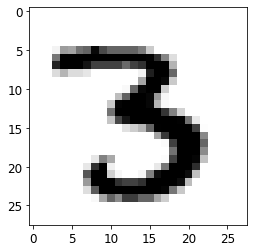

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_num = X[12]

some_num = some_num.reshape(28,28)

plt.imshow(some_num, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("on")

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle = np.random.permutation(60000)

X_train, y_train = X_train[shuffle], y_train[shuffle]

X_train.shape

(60000, 784)

In [58]:
del rf
import time
from sklearn.ensemble import RandomForestClassifier
t0 = time.time()
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1, verbose=1,random_state=42, bootstrap=True, warm_start=True)
rf.fit(X_train, y_train)
t1 = time.time()
print("Training time: {:.2f}s".format(t1-t0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min


Training time: 146.62s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


In [15]:
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.1s


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.5s finished


In [28]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
pca = PCA()
x = pca.fit(X_train)
var = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(var >= 0.95)+1
d
# 1 - pca.explained_variance_ratio_.sum()

154

In [46]:
pca = PCA(n_components=0.95)
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

In [59]:
import time 
t0 = time.time()
rf2 = RandomForestClassifier(n_estimators=1000,n_jobs=-1, verbose=1,random_state=42, bootstrap=True, warm_start=True)
rf2.fit(x_train, y_train)
t1 = time.time()
print('Training time: {:.2f}'.format(t1-t0))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min


Training time: 253.62


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.2min finished


In [61]:
# y_train.shape
y_pred = rf2.predict(x_test)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.9s


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.93      0.94       892
           6       0.97      0.98      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.91      0.93       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.1s finished


### Outcome:

Train time on full dataset: 146.62s

Train time after PCA: 253.62s

Accuracy decreased by 2%.

Not entirely sure why training time slowed. I was expecting the opposite. I did expect accuracy to reduce slightly, as we are losing some variance in the dataset.

Q. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [4]:
#taking smaller subset to speed up training
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
x = X_train[idx]
y = y_train[idx]
x.shape

(10000, 784)

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tx_train = tsne.fit_transform(x)
# tx_test = tsne.transform(x_test)

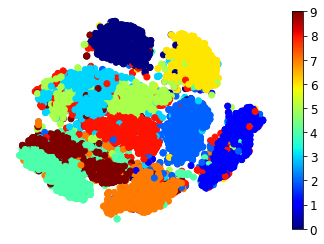

In [15]:
plt.scatter(tx_train[:,0], tx_train[:,1], cmap='jet', c=y)
plt.axis("off")
plt.colorbar()

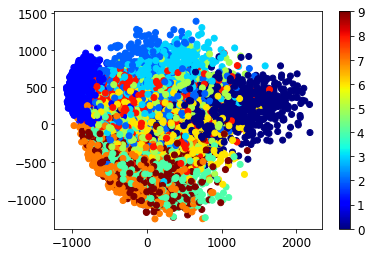

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
px_train = pca.fit_transform(x)
plt.scatter(px_train[:,0],px_train[:,1], c=y, cmap='jet')
plt.colorbar()

### Submit your notebook

Submit your solution here

Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
